# Haonan Xu 7748987436

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [2]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv("../data/communities.data",header=None) 

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


# 1.a.b

In [5]:
# drop non-predictive attribute 
cols = [0,1,2,3,4]
data.drop(data.columns[cols],axis=1,inplace=True)

In [6]:
data

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [7]:
data = data.replace('?', np.nan)

In [8]:
#print number of invalid values for each column
print(data.isnull().sum().to_string())

5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        1
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54        0
55        0
56        0
57        0
58        0
59        0
60        0
61        0
62        0
63        0
64        0
65        0
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77        0
78        0
79        0
80        0
81        0
82        0
83        0
84        0
85        0
86        0
87        0
88  

In [9]:
data = data.replace(np.nan, None)

In [10]:
data  = data.astype('float')

In [11]:
data.dtypes

5      float64
6      float64
7      float64
8      float64
9      float64
        ...   
123    float64
124    float64
125    float64
126    float64
127    float64
Length: 123, dtype: object

In [12]:
# data imputation using mean value for the invalid values in each column (offset=5)
data.iloc[:, 25].fillna(data.iloc[:, 25].mean(), inplace = True)
data.iloc[:, 96].fillna(data.iloc[:, 96].mean(), inplace = True)
data.iloc[:, 97].fillna(data.iloc[:, 97].mean(), inplace = True)
data.iloc[:, 98].fillna(data.iloc[:, 98].mean(), inplace = True)
data.iloc[:, 99].fillna(data.iloc[:, 99].mean(), inplace = True)
data.iloc[:, 100].fillna(data.iloc[:, 100].mean(), inplace = True)
data.iloc[:, 101].fillna(data.iloc[:, 101].mean(), inplace = True)
data.iloc[:, 102].fillna(data.iloc[:, 102].mean(), inplace = True)
data.iloc[:, 103].fillna(data.iloc[:, 103].mean(), inplace = True)
data.iloc[:, 104].fillna(data.iloc[:, 104].mean(), inplace = True)
data.iloc[:, 105].fillna(data.iloc[:, 105].mean(), inplace = True)
data.iloc[:, 106].fillna(data.iloc[:, 106].mean(), inplace = True)
data.iloc[:, 107].fillna(data.iloc[:, 107].mean(), inplace = True)
data.iloc[:, 108].fillna(data.iloc[:, 108].mean(), inplace = True)
data.iloc[:, 109].fillna(data.iloc[:, 109].mean(), inplace = True)
data.iloc[:, 110].fillna(data.iloc[:, 110].mean(), inplace = True)
data.iloc[:, 111].fillna(data.iloc[:, 111].mean(), inplace = True)
data.iloc[:, 112].fillna(data.iloc[:, 112].mean(), inplace = True)
data.iloc[:, 116].fillna(data.iloc[:, 116].mean(), inplace = True)
data.iloc[:, 117].fillna(data.iloc[:, 117].mean(), inplace = True)
data.iloc[:, 118].fillna(data.iloc[:, 118].mean(), inplace = True)
data.iloc[:, 119].fillna(data.iloc[:, 119].mean(), inplace = True)
data.iloc[:, 121].fillna(data.iloc[:, 121].mean(), inplace = True)



In [13]:
#invalid values have been filled with mean
print(data.isnull().sum().to_string())

5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
111    0
112    0
113    0
114    0
115    0
1

In [14]:
train_df  = data.iloc[:1495]
test_df = data.iloc[1496:1993]
train_df

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.06,0.04,0.90,0.5,0.00,0.14,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.06,0.04,0.90,0.5,0.00,0.14,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.06,0.04,0.90,0.5,0.00,0.14,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.06,0.04,0.90,0.5,0.00,0.14,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.06,0.00,0.44,0.5,0.00,0.07,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.07,0.05,0.85,0.5,0.00,0.19,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.07,0.05,0.85,0.5,0.00,0.19,0.03


In [15]:
test_df

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.00,0.01,0.77,0.0,0.00,0.18,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.00,0.01,0.77,0.0,0.00,0.18,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.00,0.01,0.77,0.0,0.00,0.18,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.00,0.01,0.77,0.0,0.00,0.18,0.12
1500,0.01,0.48,0.02,0.77,0.84,0.05,0.37,0.26,0.20,0.50,...,0.01,0.23,0.05,0.00,0.01,0.77,0.0,0.00,0.18,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,0.02,0.41,1.00,0.21,0.02,0.01,0.54,0.57,0.43,0.45,...,0.03,0.17,0.02,0.02,0.01,0.72,0.0,0.00,0.15,0.19
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.02,0.01,0.72,0.0,0.00,0.15,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.02,0.01,0.72,0.0,0.00,0.15,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23


## 1C. Plot correlation matrix

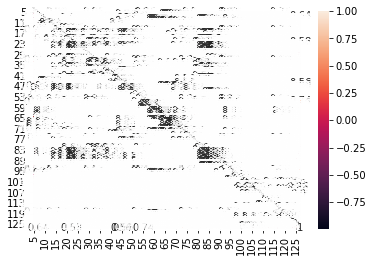

In [16]:
import seaborn as sn
corrMatrix = train_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 1d coefficient of variation

In [17]:
train_df.describe(include = 'all')

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
count,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,...,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000
mean,0.058167,0.461732,0.179839,0.752829,0.153712,0.144963,0.422649,0.492087,0.335425,0.428569,...,0.064107,0.233759,0.165197,0.166756,0.085064,0.706803,0.445485,0.093304,0.201304,0.240609
std,0.130359,0.164284,0.256970,0.248594,0.208910,0.233694,0.155993,0.143352,0.167816,0.176903,...,0.105482,0.202085,0.230799,0.222577,0.150967,0.222922,0.404796,0.238201,0.170580,0.237699
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.640000,0.040000,0.010000,0.330000,0.410000,0.250000,0.310000,...,0.020000,0.100000,0.020000,0.040000,0.020000,0.630000,0.000000,0.000000,0.110000,0.070000
50%,0.020000,0.430000,0.060000,0.850000,0.070000,0.040000,0.400000,0.470000,0.290000,0.430000,...,0.040000,0.180000,0.070000,0.070000,0.030000,0.760000,0.500000,0.000000,0.160000,0.150000
75%,0.050000,0.540000,0.220000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.540000,...,0.070000,0.280000,0.190000,0.200000,0.070000,0.850000,1.000000,0.000000,0.220000,0.335000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
for i in range(5,127):
    print('CV for ',i,':', train_df[i].std()/train_df[i].mean()) 

CV for  5 : 2.2411046245803745
CV for  6 : 0.3557995664028941
CV for  7 : 1.4288854186502822
CV for  8 : 0.3302126634442826
CV for  9 : 1.359099684159002
CV for  10 : 1.612091005228411
CV for  11 : 0.3690831192095117
CV for  12 : 0.2913148106352062
CV for  13 : 0.5003099115377213
CV for  14 : 0.4127759758512281
CV for  15 : 2.0384614919156445
CV for  16 : 0.6433181716461008
CV for  17 : 0.5919781653450651
CV for  18 : 0.3286140569015946
CV for  19 : 0.701897873082006
CV for  20 : 0.365334582744191
CV for  21 : 0.36071544651696696
CV for  22 : 0.7062058943769388
CV for  23 : 0.3454209567630026
CV for  24 : 0.5406701530549352
CV for  25 : 0.5580794526579645
CV for  26 : 0.519828467024789
CV for  27 : 0.5993405451897994
CV for  28 : 0.8183681264327733
CV for  29 : 0.6148655265869314
CV for  30 : 0.6741691757937555
CV for  31 : 0.4840679504501606
CV for  32 : 2.3424431162181505
CV for  33 : 0.754469978085357
CV for  34 : 0.6804903296377428
CV for  35 : 0.5337533808931807
CV for  36 : 0.592

## we can see the 11 features with highest CV are: 5,15,32,54,56,94,95,125,101,113,122
## Note: after ignoring the non-predictive and goal attributes, we have 122 predictive attributes indexed from 5 to 126 
,

## 1e. scatter and box plot

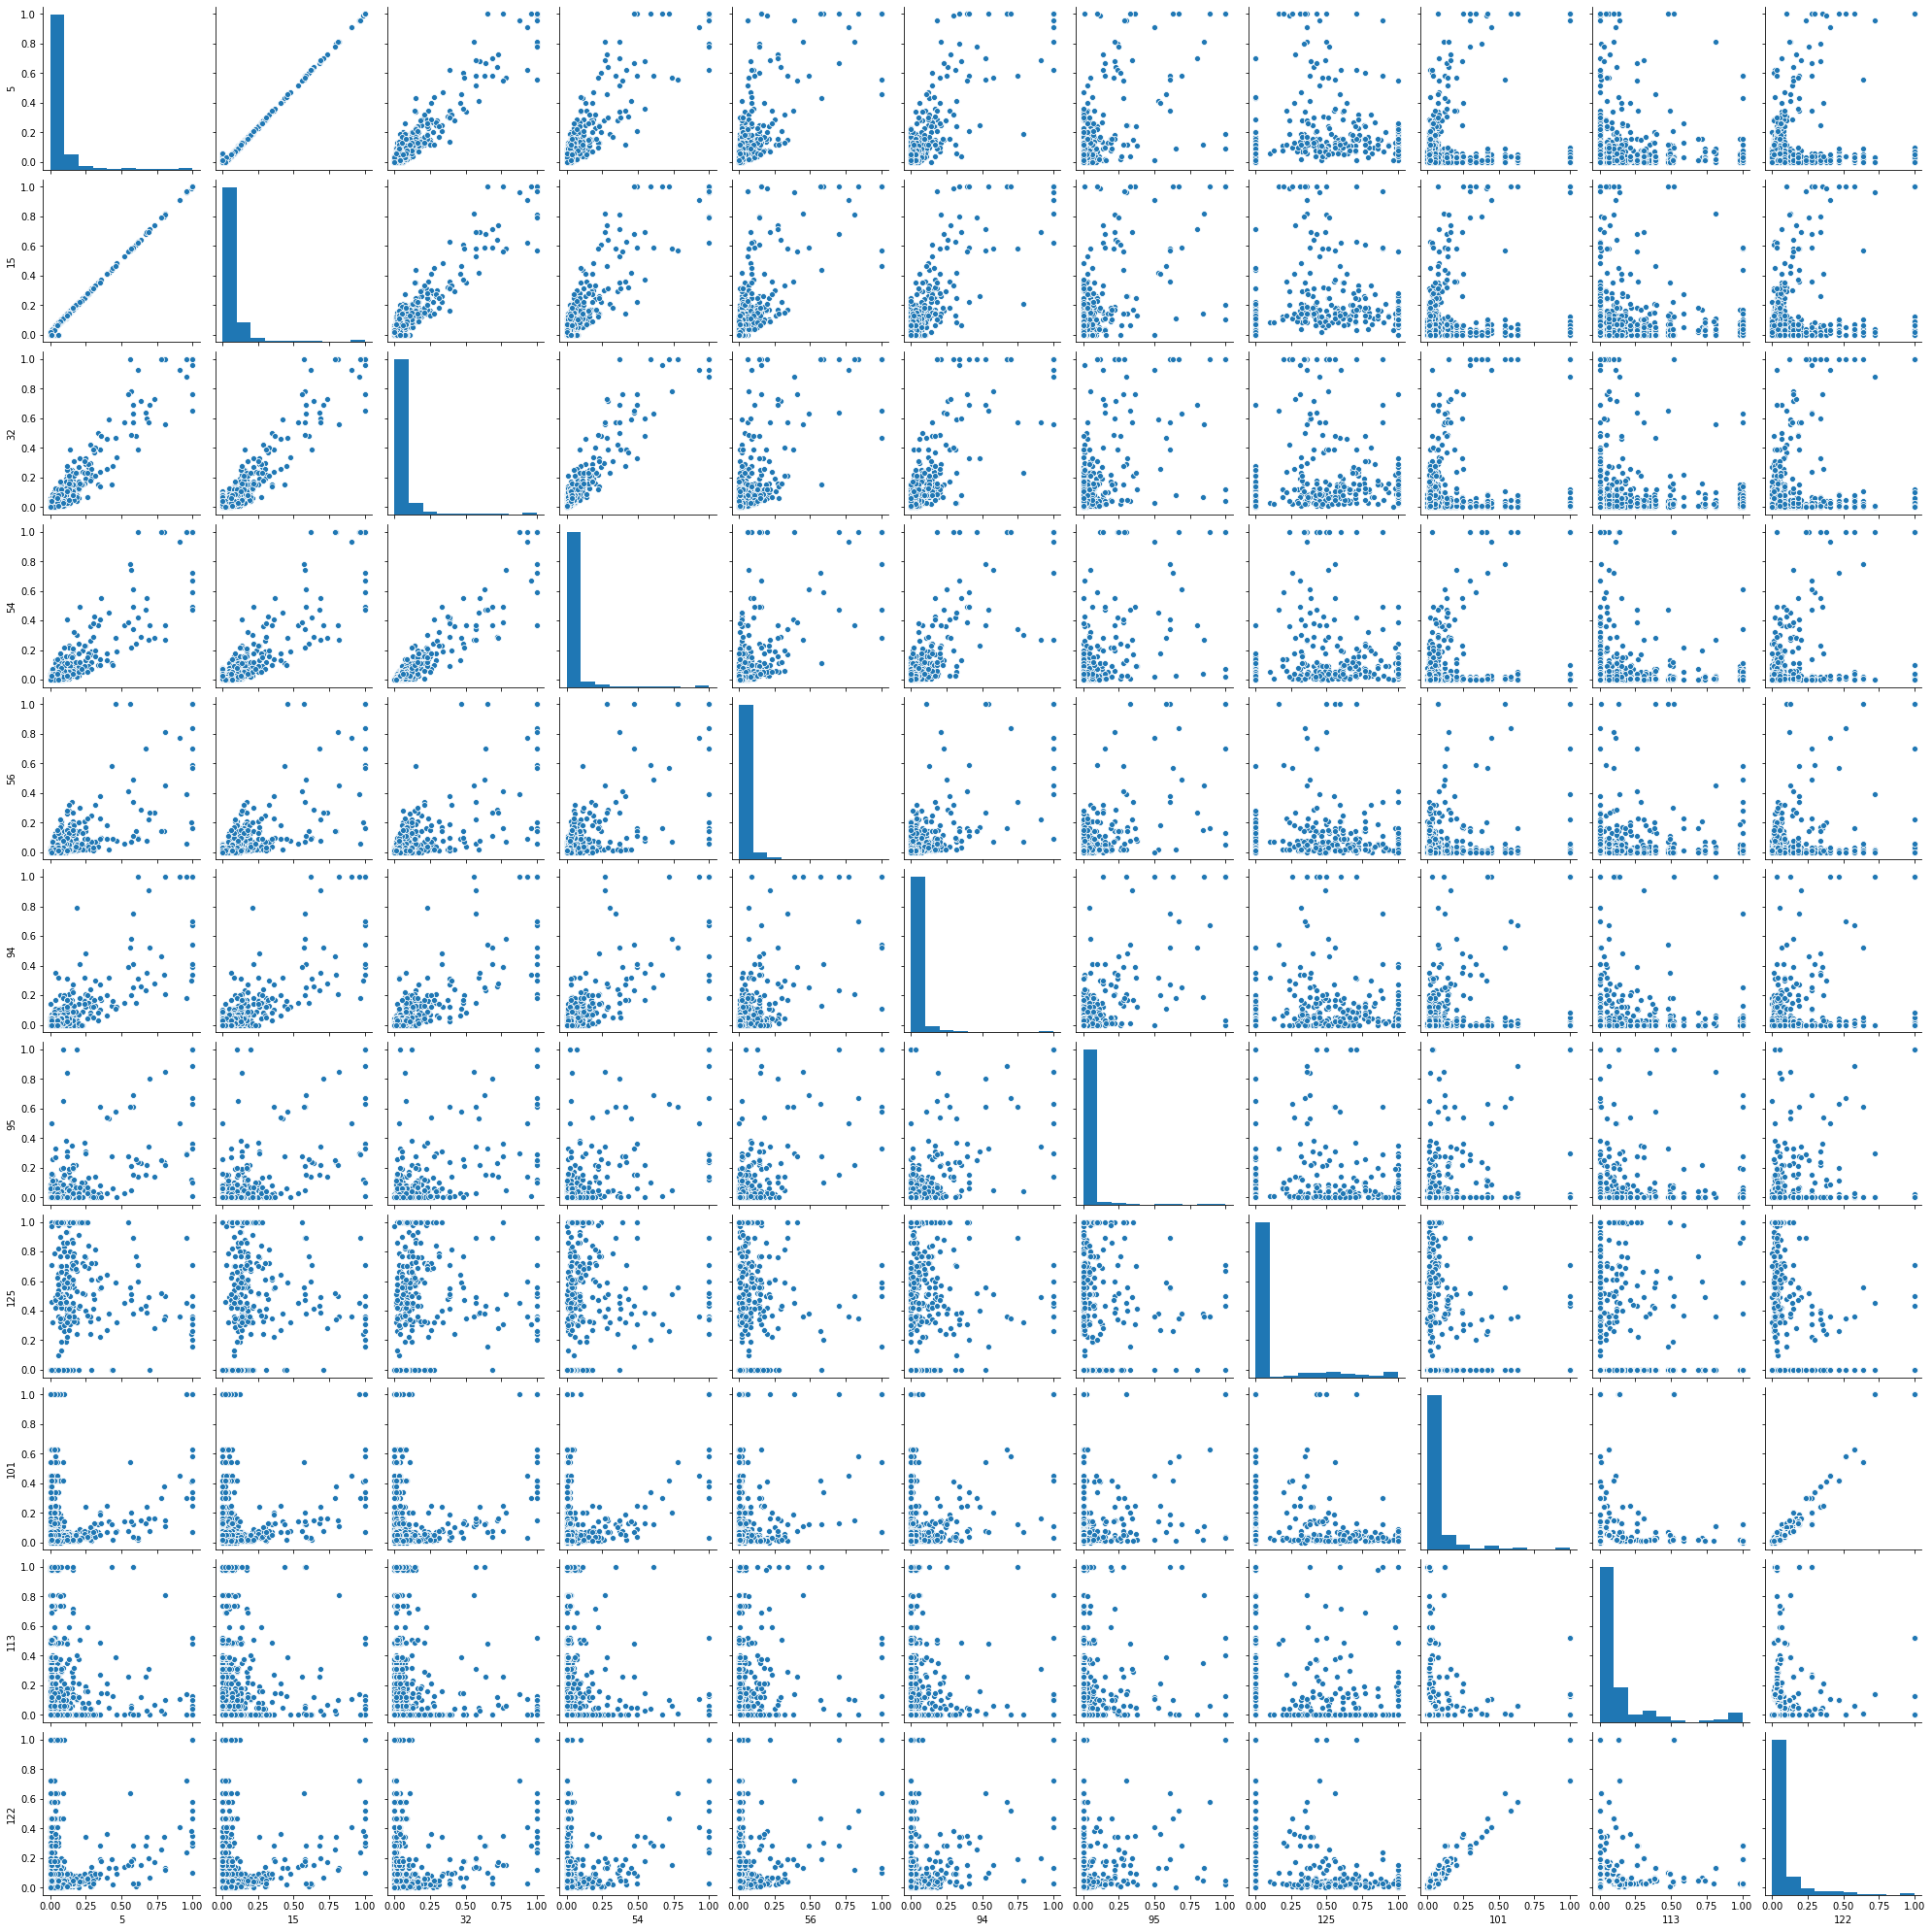

In [19]:
sns.pairplot(train_df[[5, 15,32,54,56,94,95,125,101,113,122]])

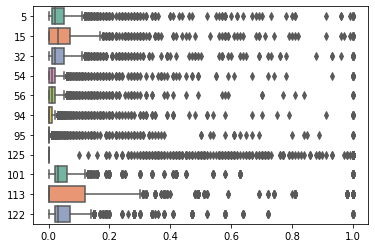

In [20]:
#reference: https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data=train_df[[5, 15,32,54,56,94,95,125,101,113,122]], orient="h", palette="Set2")

## 1f. Fit a linear model using least squares to the training set and report the test error

In [21]:
test_X = test_df[test_df.columns[0:122]]
test_y = test_df[test_df.columns[122:123]]

In [22]:
train_X = train_df[train_df.columns[0:122]]
train_y = train_df[train_df.columns[122:123]]
reg = LinearRegression().fit(train_X, train_y)

y_pred = reg.predict(test_X)
y_true = test_y
mean_squared_error(y_true, y_pred)

1.9713818965166907e+18

### OLS test error: 1.9713818965167846e+18

# 1.g ridge regression with CV (try alpha with 0.1,1,5,10)

In [23]:
# 10-fold-CV with alpha = 1.0 
single_ridge = Ridge(alpha=1.0)
mse_scorer = make_scorer(mean_squared_error)

cv_alpha_1 = cross_val_score(single_ridge, train_X, train_y, cv=10, scoring=mse_scorer)
print(cv_alpha_1)
print('Lowest MSE when alpha = 1.0 : ',cv_alpha_1.min() )

[0.02400427 0.01979881 0.02523476 0.02056811 0.02427969 0.01637035
 0.0180312  0.01146153 0.01585141 0.01530168]
Lowest MSE when alpha = 1.0 :  0.011461528724504564


In [24]:
# 10-fold-CV with alpha = 0.1 
single_ridge = Ridge(alpha=0.1)
mse_scorer = make_scorer(mean_squared_error)

cv_alpha_1 = cross_val_score(single_ridge, train_X, train_y, cv=10, scoring=mse_scorer)
print(cv_alpha_1)
print('Lowest MSE when alpha = 0.1 : ',cv_alpha_1.min() )

[0.02437645 0.02013209 0.02542316 0.02184883 0.0241435  0.01641262
 0.01841012 0.01224501 0.01587807 0.01557578]
Lowest MSE when alpha = 0.1 :  0.01224501387742731


In [25]:
# 10-fold-CV with alpha = 10 
single_ridge = Ridge(alpha=10)
mse_scorer = make_scorer(mean_squared_error)

cv_alpha_1 = cross_val_score(single_ridge, train_X, train_y, cv=10, scoring=mse_scorer)
print(cv_alpha_1)
print('Lowest MSE when alpha = 10 : ',cv_alpha_1.min() )

[0.02400507 0.0201097  0.0257218  0.02013876 0.02390978 0.01711452
 0.01869054 0.01158033 0.01586217 0.0152943 ]
Lowest MSE when alpha = 10 :  0.011580329086217124


In [26]:
# 10-fold-CV with alpha = 5 
single_ridge = Ridge(alpha=5)
mse_scorer = make_scorer(mean_squared_error)

cv_alpha_1 = cross_val_score(single_ridge, train_X, train_y, cv=10, scoring=mse_scorer)
print(cv_alpha_1)
print('Lowest MSE when alpha = 5 : ',cv_alpha_1.min() )

[0.023937   0.01998569 0.0254984  0.02012238 0.02418606 0.01682689
 0.01836397 0.01141663 0.01578481 0.0152782 ]
Lowest MSE when alpha = 5 :  0.011416628151572199


### So alpha = 1 is the best alpha with the lowest MSE when selecting alpha using cross-validation 

In [27]:
# Now we use alpha = 1, refit a ridge regression with all train data 
best_alpha_ridge = Ridge(alpha=1)
best_alpha_ridge = best_alpha_ridge.fit(train_X,train_y)
y_pred = best_alpha_ridge.predict(test_X)
y_true = test_y
mean_squared_error(y_true, y_pred)

0.017770432903440287

### Ridge regression with alpha=1, test MSE: 0.017770432903440284, much smaller than OLS

# 1.(h) Lasso with CV

In [28]:
# Lasso 10-fold-CV with alpha = 0.001
singe_lasso = linear_model.Lasso(alpha=0.001)
mse_scorer = make_scorer(mean_squared_error)

cv_alpha_2 = cross_val_score(singe_lasso, train_X, train_y, cv=10, scoring=mse_scorer)
print(cv_alpha_2)
print('Lowest MSE when alpha = 0.001 : ',cv_alpha_2.min() )

[0.02464458 0.02036833 0.02677004 0.02105418 0.02300687 0.01756826
 0.01894222 0.01176667 0.01578395 0.01544481]
Lowest MSE when alpha = 0.001 :  0.01176666834301359


In [29]:
# Lasso 10-fold-CV with alpha = 0.01
singe_lasso = linear_model.Lasso(alpha=0.01)
mse_scorer = make_scorer(mean_squared_error)

cv_alpha_2 = cross_val_score(singe_lasso, train_X, train_y, cv=10, scoring=mse_scorer)
print(cv_alpha_2)
print('Lowest MSE when alpha = 0.01 : ',cv_alpha_2.min() )

[0.03123636 0.02430971 0.032903   0.0263686  0.02638158 0.0219418
 0.02400775 0.01624937 0.02342302 0.01851755]
Lowest MSE when alpha = 0.01 :  0.01624937287425914


In [30]:
# Lasso 10-fold-CV with alpha = 0.1
singe_lasso = linear_model.Lasso(alpha=0.1)
mse_scorer = make_scorer(mean_squared_error)

cv_alpha_2 = cross_val_score(singe_lasso, train_X, train_y, cv=10, scoring=mse_scorer)
print(cv_alpha_2)
print('Lowest MSE when alpha = 0.1 : ',cv_alpha_2.min() )

[0.05474196 0.05536338 0.06735067 0.05517215 0.06459464 0.05276481
 0.06449436 0.0499215  0.05747635 0.04322436]
Lowest MSE when alpha = 0.1 :  0.04322435913922595


In [31]:
# Lasso 10-fold-CV with alpha = 1
singe_lasso = linear_model.Lasso(alpha=1)
mse_scorer = make_scorer(mean_squared_error)

cv_alpha_2 = cross_val_score(singe_lasso, train_X, train_y, cv=10, scoring=mse_scorer)
print(cv_alpha_2)
print('Lowest MSE when alpha = 1 : ',cv_alpha_2.min() )


[0.05474196 0.05536338 0.06735067 0.05517215 0.06459464 0.05276481
 0.06449436 0.0499215  0.05747635 0.04322436]
Lowest MSE when alpha = 1 :  0.04322435913922595


In [32]:
# Lasso 10-fold-CV with alpha = 100
singe_lasso = linear_model.Lasso(alpha=100)
mse_scorer = make_scorer(mean_squared_error)

cv_alpha_2 = cross_val_score(singe_lasso, train_X, train_y, cv=10, scoring=mse_scorer)
print(cv_alpha_2)
print('Lowest MSE when alpha = 100 : ',cv_alpha_2.min() )


[0.05474196 0.05536338 0.06735067 0.05517215 0.06459464 0.05276481
 0.06449436 0.0499215  0.05747635 0.04322436]
Lowest MSE when alpha = 100 :  0.04322435913922595


In [33]:
# Lasso 10-fold-CV with alpha = 1000
singe_lasso = linear_model.Lasso(alpha=1000)
mse_scorer = make_scorer(mean_squared_error)

cv_alpha_2 = cross_val_score(singe_lasso, train_X, train_y, cv=10, scoring=mse_scorer)
print(cv_alpha_2)
print('Lowest MSE when alpha = 1000 : ',cv_alpha_2.min() )


[0.05474196 0.05536338 0.06735067 0.05517215 0.06459464 0.05276481
 0.06449436 0.0499215  0.05747635 0.04322436]
Lowest MSE when alpha = 1000 :  0.04322435913922595


In [34]:
# Now we use alpha = 0.001, refit a lasso regression with all train data 
best_lasso = linear_model.Lasso(alpha=0.001)
best_lasso = best_lasso.fit(train_X,train_y)
y_pred = best_lasso.predict(test_X)
y_true = test_y
mean_squared_error(y_true, y_pred)

0.017484935951361115

### Lasso regression with alpha=0.001, test MSE: 0.017484935951361115

In [35]:
# lassso coefficient 
print(best_lasso.coef_)

[ 0.         -0.          0.2042126  -0.01680331  0.          0.
 -0.         -0.00378952 -0.          0.          0.          0.03878954
  0.         -0.          0.         -0.          0.          0.02789085
 -0.         -0.          0.          0.         -0.         -0.
  0.01030296  0.          0.          0.         -0.          0.
  0.         -0.          0.          0.         -0.         -0.
  0.         -0.          0.14461369 -0.          0.          0.
  0.         -0.         -0.22086069 -0.0067564  -0.         -0.
 -0.0490092   0.          0.15582579  0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.00050606
 -0.          0.          0.          0.          0.         -0.
  0.         -0.          0.1518215   0.         -0.          0.10019589
 -0.04558995 -0.          0.03529701 -0.          0.          0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.          0.02062645  0.         -0.014424

### Use standardized data 

In [36]:
scaler = preprocessing.StandardScaler().fit(train_X)
train_X_std = scaler.transform(train_X)
test_X_std = scaler.transform(test_X)

std_lasso = linear_model.Lasso(alpha=0.001)
std_lasso = std_lasso.fit(train_X_std,train_y)


y_pred = std_lasso.predict(test_X_std)
y_true = test_y
mean_squared_error(y_true, y_pred)

0.01766373049022479

### Comparing normalized and standardized:
### Normalized with alpha=0.001, test MSE: 0.017484935951361115
### Standardized with alpha=0.001, test MSE: 0.01766373049022479
### Almost the same

# 1(i). PCR, selecting best M with CV

In [37]:
# Example for use dimension reduction methond PCA on standardized data 
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
train_X_pca = pca.fit_transform(train_X_std)
train_X_pca


array([[-1.51808688, -1.11086232,  2.72842849, -1.86617497, -0.38528267],
       [ 1.18125723,  0.3248641 ,  3.22887248, -4.0215221 , -1.99685013],
       [ 1.93301036, -2.52124159, -0.60064975, -0.4821188 , -1.32312038],
       ...,
       [ 8.50240124, -4.26719998, -1.03980727,  0.41927148, -3.05137428],
       [-5.14531948, -2.5801901 , -2.34782636,  0.97378693,  0.49426517],
       [ 6.47890951,  8.97285772, -2.12862333,  1.51772307, -5.82424142]])

In [38]:
# select best #components using CV
mse_scorer = make_scorer(mean_squared_error)
n_cv_holder=[]
for n in range(2,123):
    temp=[]
    pca=PCA(n_components=n)
    train_X_pca = pca.fit_transform(train_X_std)
    reg = LinearRegression()
    cv_mse = cross_val_score(reg, train_X_pca, train_y, cv=5,scoring=mse_scorer)
    min_fold_mse = cv_mse.min()  #min mse of 5-fold cv
    temp.append(n)
    temp.append(min_fold_mse)
    n_cv_holder.append(temp)
    print("MSE for 5-fold cross validation when princple components = ", n ," :" ,cv_mse)


MSE for 5-fold cross validation when princple components =  2  : [0.03177822 0.03347629 0.03243164 0.02736922 0.0247909 ]
MSE for 5-fold cross validation when princple components =  3  : [0.02897199 0.03132678 0.02942136 0.0259364  0.02305261]
MSE for 5-fold cross validation when princple components =  4  : [0.02783731 0.03016941 0.02876435 0.02633865 0.02242367]
MSE for 5-fold cross validation when princple components =  5  : [0.02732774 0.02899347 0.02640202 0.02413452 0.02234061]
MSE for 5-fold cross validation when princple components =  6  : [0.02683376 0.02937322 0.02595204 0.02399459 0.02189841]
MSE for 5-fold cross validation when princple components =  7  : [0.02705377 0.02934567 0.02593994 0.02365206 0.02185738]
MSE for 5-fold cross validation when princple components =  8  : [0.0253232  0.02922988 0.02431581 0.02306918 0.02118414]
MSE for 5-fold cross validation when princple components =  9  : [0.0249769  0.0271762  0.02207515 0.01961309 0.01981449]
MSE for 5-fold cross val

MSE for 5-fold cross validation when princple components =  70  : [0.02260034 0.02238247 0.02179121 0.01597231 0.01578459]
MSE for 5-fold cross validation when princple components =  71  : [0.02265002 0.02254652 0.0218932  0.01593002 0.01586105]
MSE for 5-fold cross validation when princple components =  72  : [0.02240398 0.02249633 0.02182211 0.01585622 0.01570785]
MSE for 5-fold cross validation when princple components =  73  : [0.0223144  0.02245614 0.02193197 0.01582055 0.01578436]
MSE for 5-fold cross validation when princple components =  74  : [0.02240799 0.02242002 0.02195465 0.01591801 0.01592718]
MSE for 5-fold cross validation when princple components =  75  : [0.02237508 0.02242526 0.02197611 0.01586027 0.0158926 ]
MSE for 5-fold cross validation when princple components =  76  : [0.02245404 0.02237881 0.0219275  0.01586641 0.01586383]
MSE for 5-fold cross validation when princple components =  77  : [0.02256842 0.02298411 0.0219649  0.01588657 0.01611952]
MSE for 5-fold c

In [39]:
n_cv_holder

[[2, 0.02479089729651496],
 [3, 0.023052614245249313],
 [4, 0.022423670169011527],
 [5, 0.02234061393374145],
 [6, 0.02189841270607555],
 [7, 0.021857380801851692],
 [8, 0.021184137558195624],
 [9, 0.019613089301996473],
 [10, 0.017108955965301598],
 [11, 0.0168766285098765],
 [12, 0.016894572918101876],
 [13, 0.01647762185805316],
 [14, 0.016403414520356867],
 [15, 0.01637751506940196],
 [16, 0.01655732521739155],
 [17, 0.016603726366070742],
 [18, 0.016457545248245657],
 [19, 0.016417628717830476],
 [20, 0.016284717800757628],
 [21, 0.016350667492017204],
 [22, 0.01621470158563398],
 [23, 0.016259465719622265],
 [24, 0.016242760600812037],
 [25, 0.01616008184639236],
 [26, 0.01607035413815549],
 [27, 0.01615393782985583],
 [28, 0.016121540048363647],
 [29, 0.01613377024675553],
 [30, 0.016108989658329208],
 [31, 0.016321776493893714],
 [32, 0.016488027401626502],
 [33, 0.016481620215914792],
 [34, 0.01613084909487907],
 [35, 0.015952534453718966],
 [36, 0.015941567974662035],
 [37, 0

In [40]:

best_n_mse=1
for i in range(0,121):
    if n_cv_holder[i][1] < best_n_mse:
        best_n_mse =  n_cv_holder[i][1]
for i in range(0,121):
    if n_cv_holder[i][1]==best_n_mse:
        best_princple_component=n_cv_holder[i][0]
    

In [41]:
print("best M and MSE: ", best_princple_component, best_n_mse)

best M and MSE:  49 0.015266398363379192


###  Refit a linear model with the #principle component selected, and report test error 

In [42]:
pca=PCA(n_components=49)
train_X_pca = pca.fit_transform(train_X_std)
test_X_pca = pca.fit_transform(test_X_std)

reg_PCA = LinearRegression().fit(train_X_pca,train_y)
y_pred = reg_PCA.predict(test_X_pca)
y_true = test_y
mean_squared_error(y_true, y_pred)

0.036951793602420575

### PCR test MSE: 0.03694386773231264 with m=49

# 1(j) 

# Tree Based Method

# 2(a)(b)(i) Download and prepare data

In [43]:
data_2_train = pd.read_csv("../data/aps_failure_training_set.csv",skiprows=20) 

In [44]:
data_2_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [45]:
data_2_train_y = data_2_train[data_2_train.columns[0]]
data_2_train_X=data_2_train.iloc[:,1:171]


In [46]:
data_2_test = pd.read_csv("../data/aps_failure_test_set.csv",skiprows=20) 

In [47]:
data_2_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [48]:
data_2_test_X=data_2_test.iloc[:,1:171]
data_2_test_y = data_2_test[data_2_test.columns[0]]

In [49]:
data_2_test_X = data_2_test_X.replace('na', np.nan)
data_2_train_X = data_2_train_X.replace('na', np.nan)
#print number of missing values for each column
print(data_2_train_X.isnull().sum().to_string())
print('----------------------------------------------------')
print(data_2_test_X.isnull().sum().to_string())

aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
ag_000      671
ag_001      671
ag_002      671
ag_003      671
ag_004      671
ag_005      671
ag_006      671
ag_007      671
ag_008      671
ag_009      671
ah_000      645
ai_000      629
aj_000      629
ak_000     4400
al_000      642
am_0        629
an_000      642
ao_000      589
ap_000      642
aq_000      589
ar_000     2723
as_000      629
at_000      629
au_000      629
av_000     2500
ax_000     2501
ay_000      671
ay_001      671
ay_002      671
ay_003      671
ay_004      671
ay_005      671
ay_006      671
ay_007      671
ay_008      671
ay_009      671
az_000      671
az_001      671
az_002      671
az_003      671
az_004      671
az_005      671
az_006      671
az_007      671
az_008      671
az_009      671
ba_000      688
ba_001      688
ba_002      688
ba_003      688
ba_004      688
ba_005      688
ba_006      688
ba_007      688
ba_008      688
ba_009      688
bb_000  

In [50]:
## imputation method: impute with the mean of that column. 
## Better way to do this maybe: impute with the avg with all data in the future, since some colmuns are almost missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data_2_train_X)
imp.fit(data_2_test_X)
data_2_train_X = imp.transform(data_2_train_X)
data_2_test_X = imp.transform(data_2_test_X)

In [51]:
data_2_train_X = pd.DataFrame(data_2_train_X)
data_2_test_X = pd.DataFrame(data_2_test_X)

In [52]:
## Missing values for train already imputed 
print(data_2_train_X.isnull().sum().to_string())

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [53]:
## Missing values for train already imputed 
print(data_2_test_X.isnull().sum().to_string())

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [54]:
data_2_train_y

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
59995    neg
59996    neg
59997    neg
59998    neg
59999    neg
Name: class, Length: 60000, dtype: object

# 2(b)(ii) coefficient of variation

In [55]:
data_2_train_X

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,76698.0,0.772065,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.772065,0.000000e+00,439.498794,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.772065,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.772065,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.772065,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.772065,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.772065,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [56]:
for i in range(0,170):
    print('Coefficient of Variation for feature with index ',i,':', data_2_train_X[i].std()/data_2_train_X[i].mean()) 

Coefficient of Variation for feature with index  0 : 2.450937577943998
Coefficient of Variation for feature with index  1 : 2.189114782128793
Coefficient of Variation for feature with index  2 : 2.16908111613989
Coefficient of Variation for feature with index  3 : 244.19062417612514
Coefficient of Variation for feature with index  4 : 23.246447029287776
Coefficient of Variation for feature with index  5 : 18.716378016497778
Coefficient of Variation for feature with index  6 : 92.34817226497684
Coefficient of Variation for feature with index  7 : 34.42566213211758
Coefficient of Variation for feature with index  8 : 17.25298174271325
Coefficient of Variation for feature with index  9 : 8.524232169641651
Coefficient of Variation for feature with index  10 : 5.394117953308577
Coefficient of Variation for feature with index  11 : 2.9251074480175707
Coefficient of Variation for feature with index  12 : 2.344293106317932
Coefficient of Variation for feature with index  13 : 2.833036492019004

# 2(b)(iii) Correlation matrix

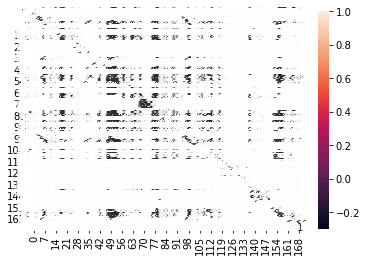

In [57]:
corrMatrix = data_2_train_X.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# 2(b)(iv) Scatter and boxlot

### The 11 predictor with highest correlation variation: 3,6,91,109,122,136,19,27,41,51,138,29,93

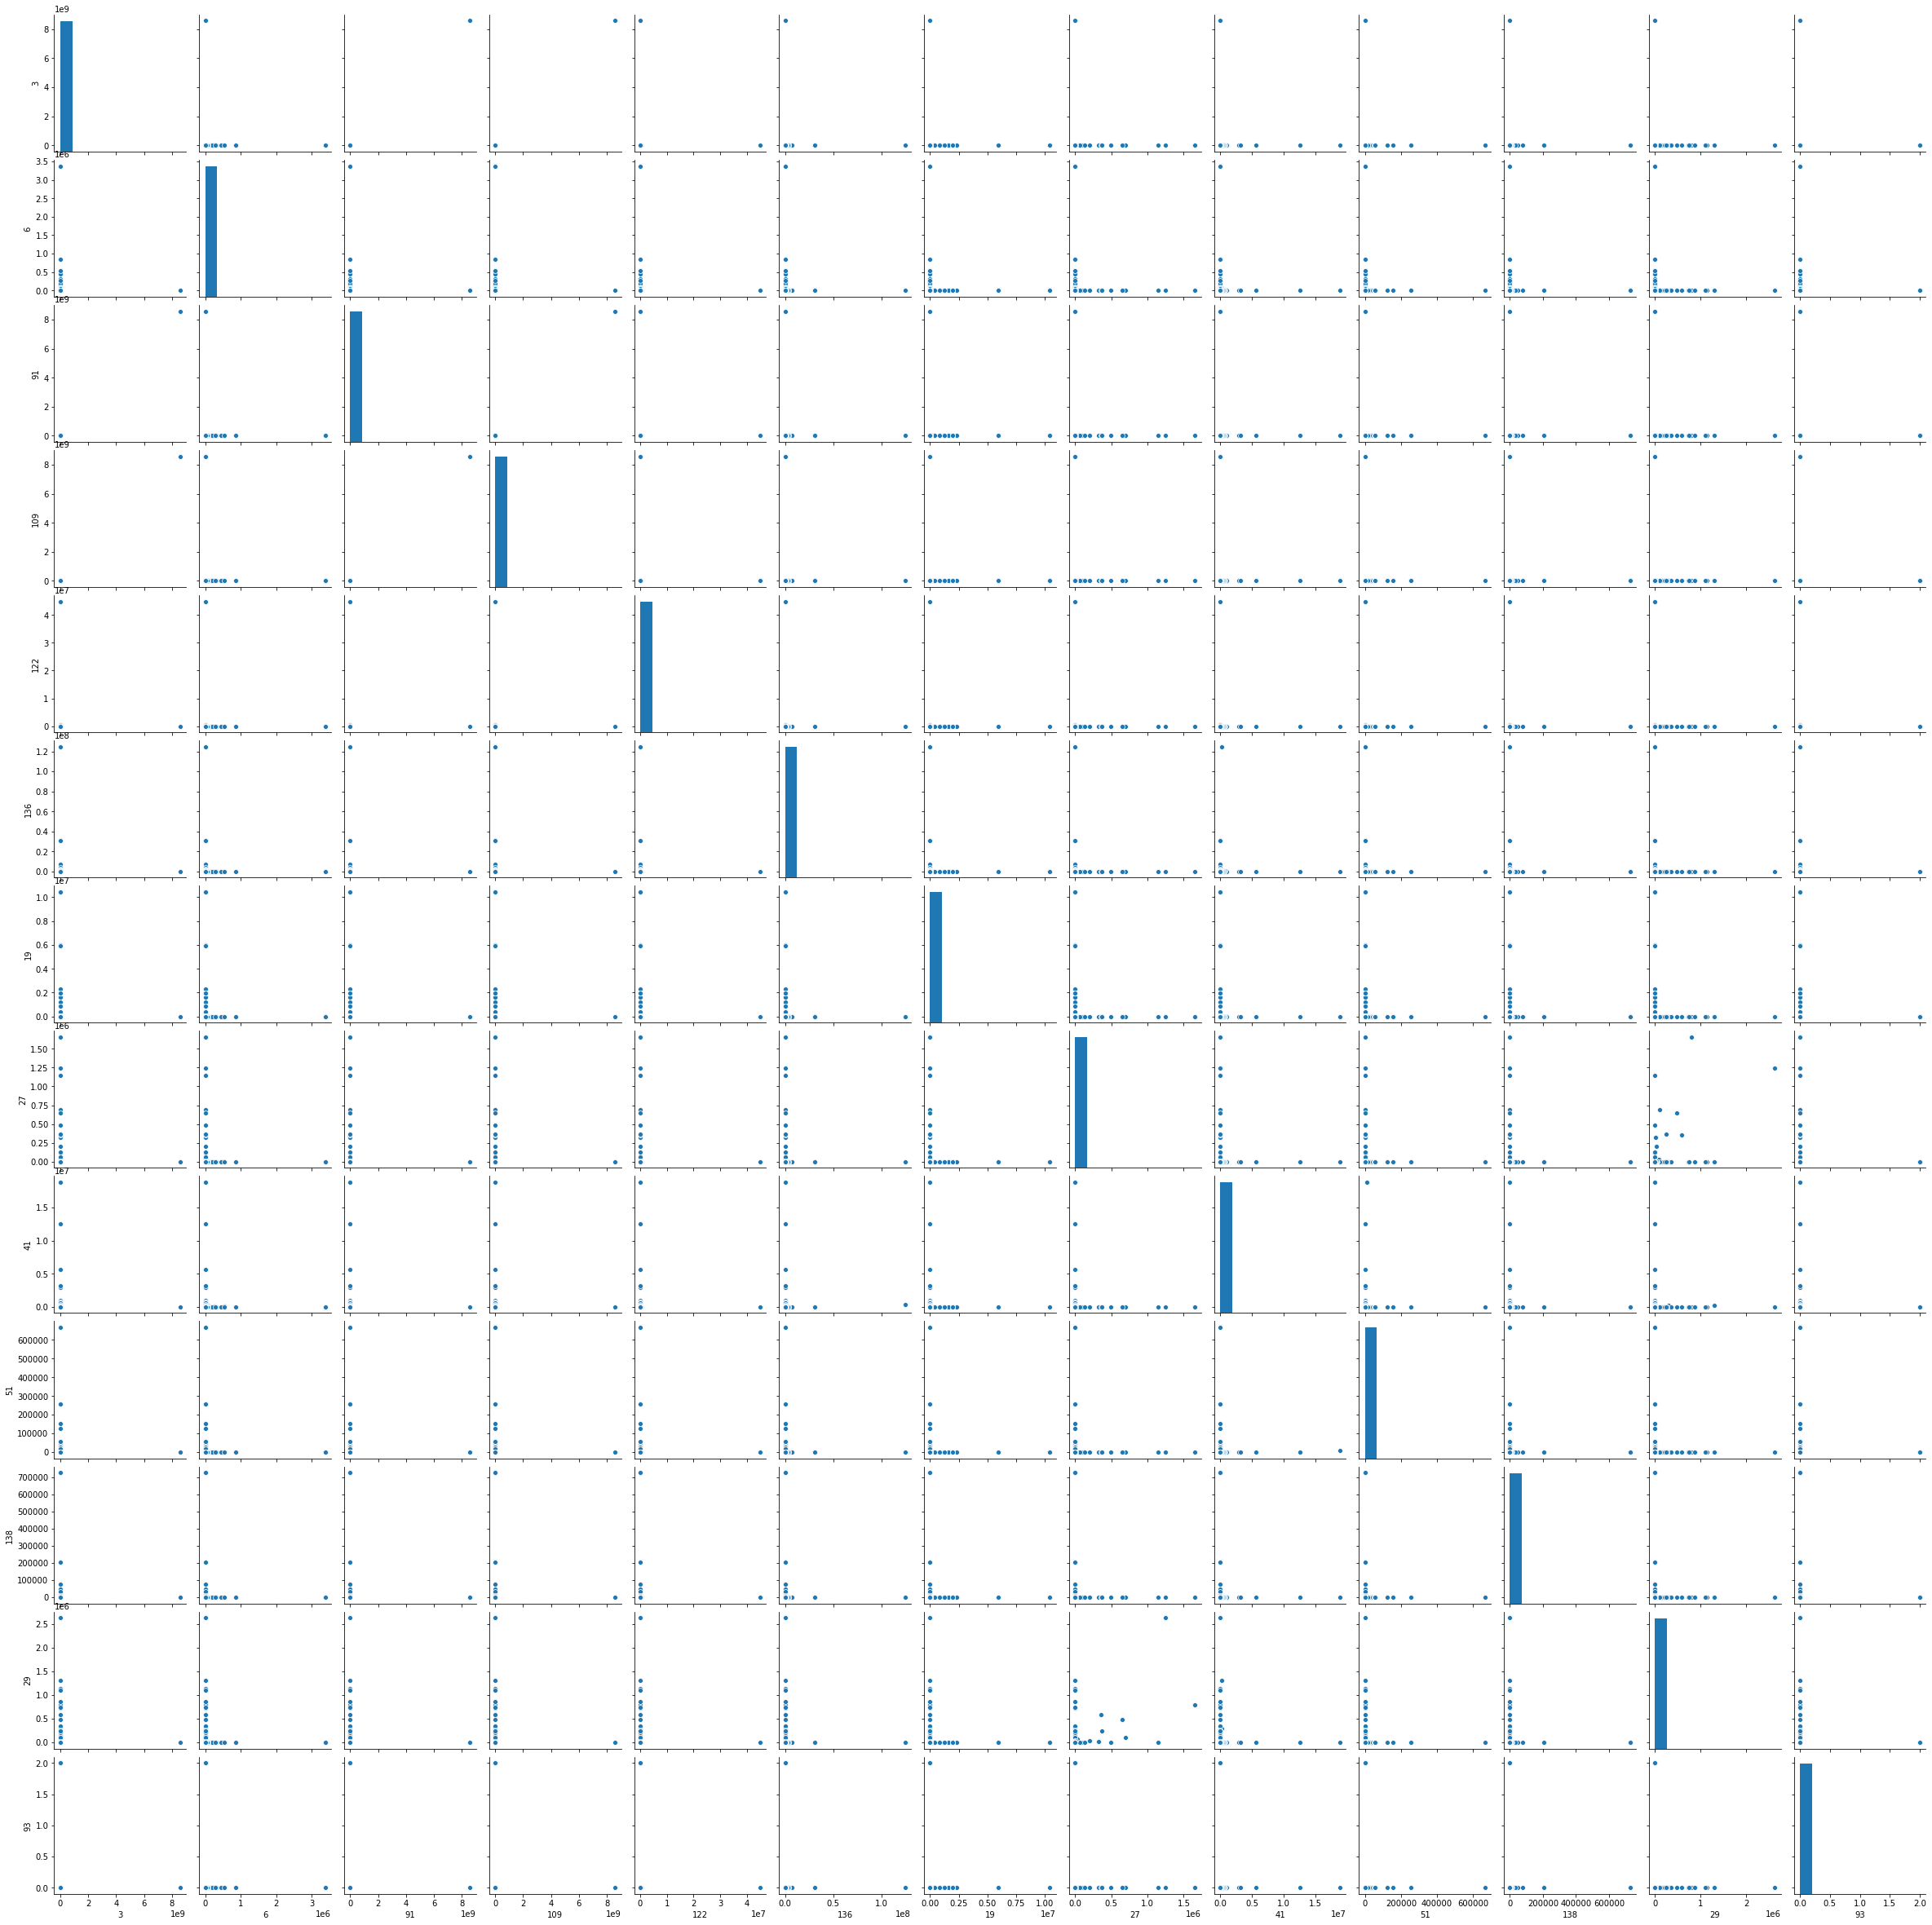

In [58]:
sns.pairplot(data_2_train_X[[3,6,91,109,122,136,19,27,41,51,138,29,93]])

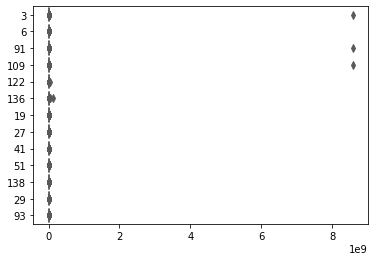

In [59]:
#reference: https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data=data_2_train_X[[3,6,91,109,122,136,19,27,41,51,138,29,93]], orient="h", palette="Set2")

# 2(b)(iv) 
### It's obviously this dataset is imbalanced=

# 2(c) train random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_2_train_X, data_2_train_y)

RandomForestClassifier()

In [61]:
## confusion matrix on train set 
y_true = data_2_train_y
y_pred= rfc.predict(data_2_train_X)
confusion_matrix(y_true, y_pred)


array([[59000,     0],
       [    0,  1000]])

### No misclassification error on train set (very overfitting), because the classfier uses the default max_depth where  nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

/Users/haonanxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


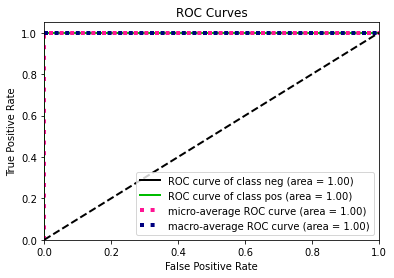

In [62]:
# roc auc on train set
import scikitplot as skplt
import matplotlib.pyplot as plt
y_probas = rfc.predict_proba(data_2_train_X)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [63]:
# confusion matrix on test set 
y_true = data_2_test_y
y_pred= rfc.predict(data_2_test_X)
print(confusion_matrix(y_true, y_pred))
print('Misclassification rate on neg class: ',17/15625)
print('Misclassification rate on pos class: ',108/(108+267))

[[15607    18]
 [  102   273]]
Misclassification rate on neg class:  0.001088
Misclassification rate on pos class:  0.288


/Users/haonanxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


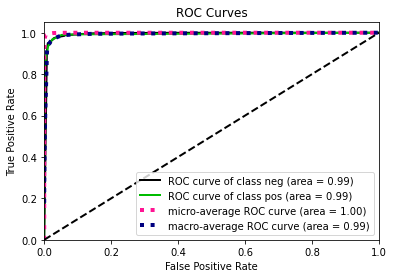

In [64]:
# roc auc on test set
y_probas = rfc.predict_proba(data_2_test_X)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [65]:
#out of bag error
rfc_oob = RandomForestClassifier(oob_score=True)
rfc_oob.fit(data_2_train_X, data_2_train_y)
rfc_oob.oob_score_

0.9938666666666667

## 2(d)Compensate for class imbalance and run 2c again

In [66]:
# set class_weight = balanced 
rfc = RandomForestClassifier(class_weight="balanced")
rfc.fit(data_2_train_X, data_2_train_y)

RandomForestClassifier(class_weight='balanced')

In [67]:
## confusion matrix on train set 
y_true = data_2_train_y
y_pred= rfc.predict(data_2_train_X)
confusion_matrix(y_true, y_pred)


array([[59000,     0],
       [    0,  1000]])

/Users/haonanxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


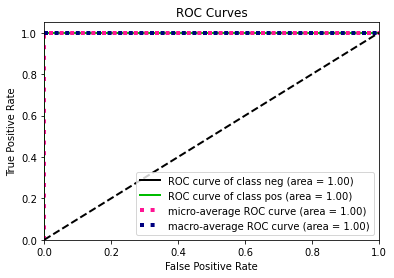

In [68]:
# roc auc on train set
import scikitplot as skplt
import matplotlib.pyplot as plt
y_probas = rfc.predict_proba(data_2_train_X)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [69]:
# confusion matrix on test set 
y_true = data_2_test_y
y_pred= rfc.predict(data_2_test_X)
print(confusion_matrix(y_true, y_pred))
print('Misclassification rate on neg class: ',12/15625)
print('Misclassification rate on pos class: ',159/(108+267))

[[15611    14]
 [  157   218]]
Misclassification rate on neg class:  0.000768
Misclassification rate on pos class:  0.424


/Users/haonanxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


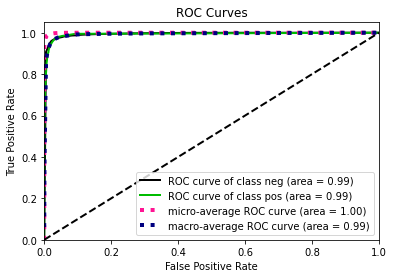

In [70]:
# roc auc on test set
y_probas = rfc.predict_proba(data_2_test_X)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

![title](../p1.jpeg)

![title](../p2.jpeg)